---------------------------------------------------
# 3. ödev --  Iris veri seti ödevi    (14.11.2024)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("IRIS.csv")

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Veri ön işleme

In [7]:
# 1. Veri Ön İşleme
# Eksik değer kontrolü
print("\nEksik Değer Kontrolü:\n", data.isnull().sum())

# Kategorik değişkenleri kodlayalım
data['species'] = data['species'].astype('category').cat.codes

# Veri setinin güncellenmiş halini gözlemleyelim
print("\nGüncellenmiş Veri Seti:")
print(data.head())


Eksik Değer Kontrolü:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Güncellenmiş Veri Seti:
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


-------------------------------------------------------
## Görselleştirme

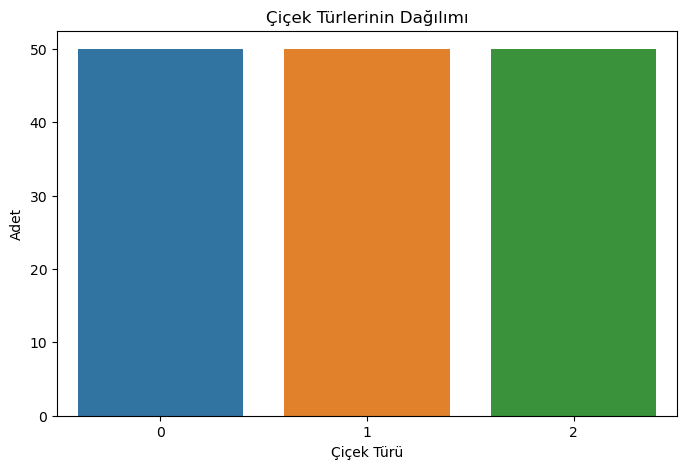

In [8]:
# Sınıf dağılımı grafiği
plt.figure(figsize=(8, 5))
sns.countplot(x='species', data=data)
plt.title("Çiçek Türlerinin Dağılımı")
plt.xlabel("Çiçek Türü")
plt.ylabel("Adet")
plt.show()

C:\Users\onura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


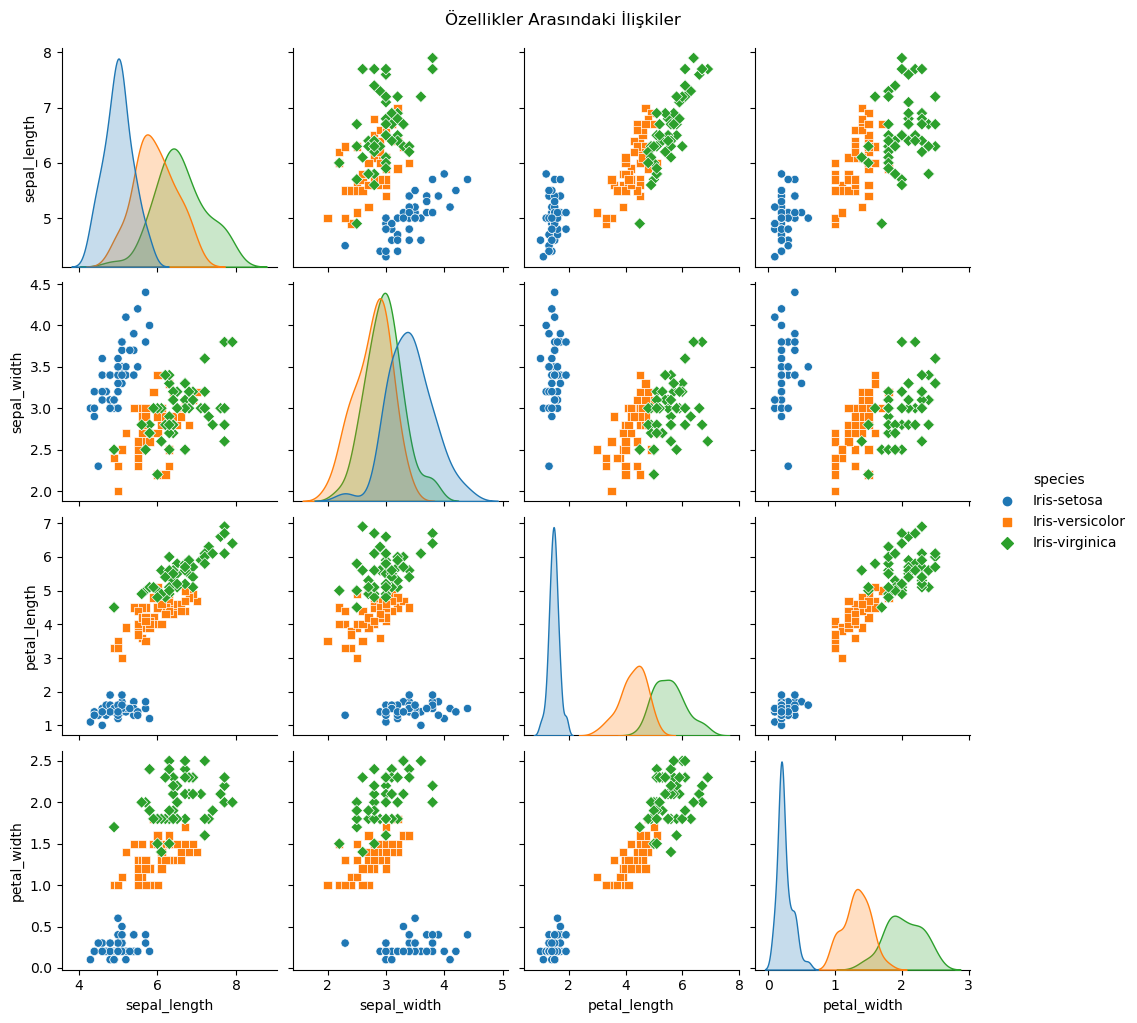

In [9]:
# Özellikler arasındaki ilişkiler - Pairplot
species_labels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
data['species'] = data['species'].map(species_labels)  # Orijinal etiketleri geri getiriyoruz
sns.pairplot(data, hue='species', markers=["o", "s", "D"])
plt.suptitle("Özellikler Arasındaki İlişkiler", y=1.02)
plt.show()

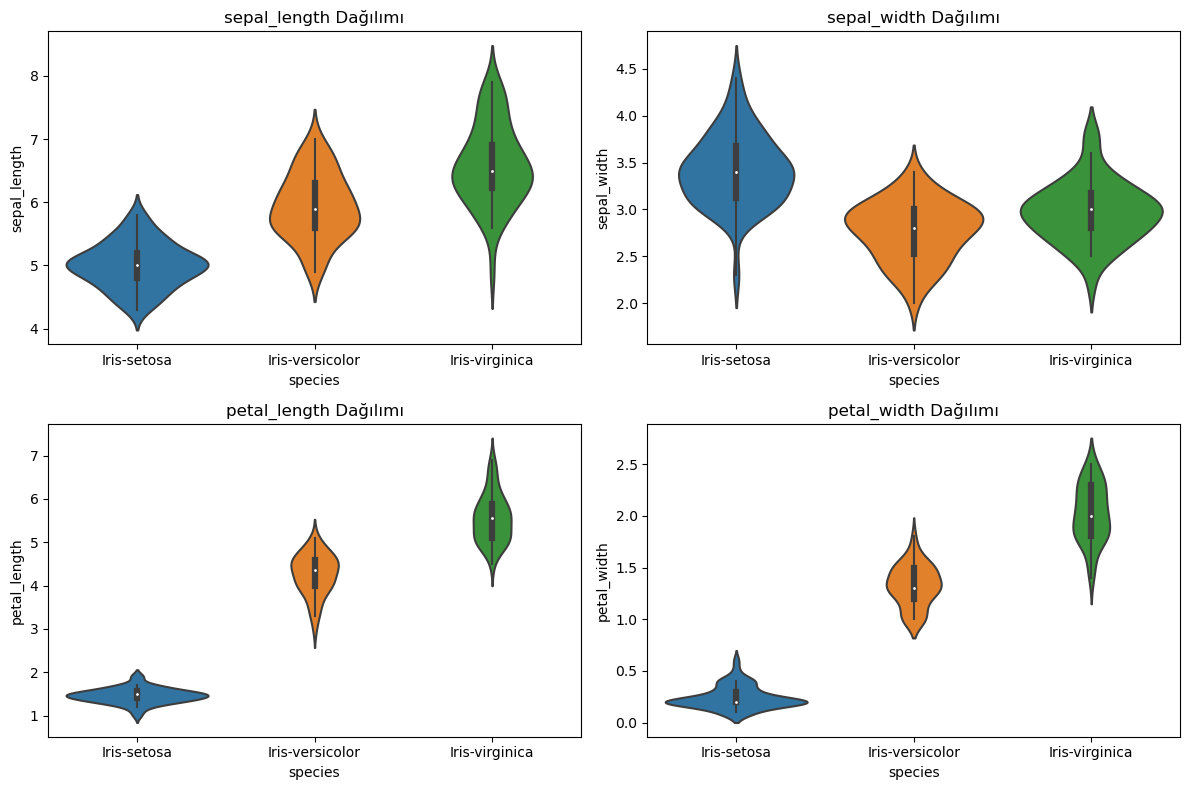

In [10]:
# Özelliklerin dağılımı - Violin Plot
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x="species", y=column, data=data)
    plt.title(f"{column} Dağılımı")
plt.tight_layout()
plt.show()

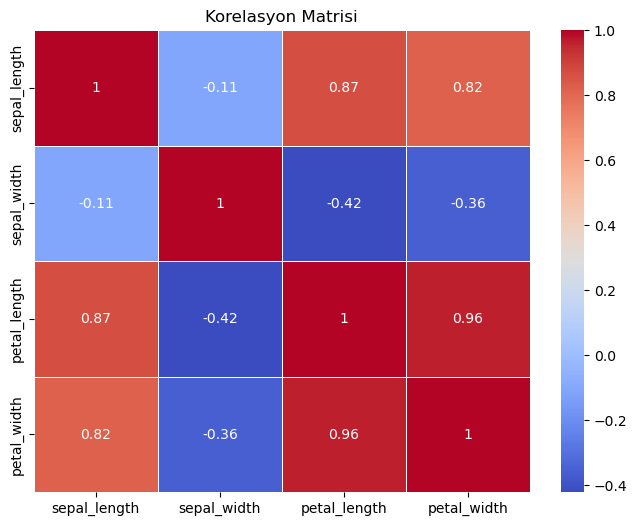

In [11]:
# Korelasyon matrisi ve Isı Haritası
correlation_matrix = data.drop(columns=['species']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

---------------
## Model Eğitimi ve Değerlendirme

In [12]:
# Kodlama işlemi nedeniyle species sütununu yeniden sayısal değerlere dönüştürelim
data['species'] = data['species'].astype('category').cat.codes

# Özellik ve hedef değişkenleri ayır
X = data.drop(columns=['species'])  # Özellikler
y = data['species']                 # Hedef

In [13]:
# Eğitim ve test veri kümesini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Modelleri tanımlayalım
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

In [17]:
# Her modelin doğruluk skorunu ve diğer değerlendirme metriklerini hesaplayalım
model_accuracies = {}
for model_name, model in models.items():
    # Modeli eğitelim
    model.fit(X_train, y_train)
    # Test verisi üzerinde tahmin yapalım
    y_pred = model.predict(X_test)
    # Doğruluk skorunu hesaplayalım
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    
    # Karışıklık matrisi ve sınıflandırma raporunu yazdıralım
    print(f"Model: {model_name}")
    print("Doğruluk Skoru:", accuracy)
    print("Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))
    print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
Doğruluk Skoru: 1.0
Karışıklık Matrisi:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------
Model: Decision Tree
Doğruluk Skoru: 1.0
Karışıklık Matrisi:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00   

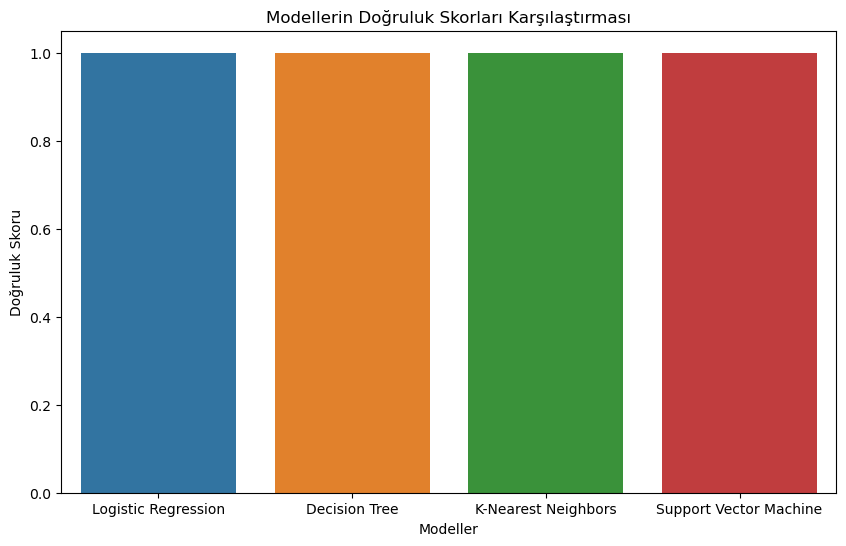

In [18]:
# Modellerin doğruluk skorlarını grafikle gösterelim
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.xlabel("Modeller")
plt.ylabel("Doğruluk Skoru")
plt.title("Modellerin Doğruluk Skorları Karşılaştırması")
plt.show()